### Exercise 4

Simulate and analyze AR, MA, ARMA, ARIMA, SARIMA models<br>
• Generate time series data then compute ACF and PACF.<br>
• Determine model orders.<br>
• Compare empiric ACF and PACF with theoretical counterpart.<br>
• Estimate the model parameters from the generated data.<br>

In [54]:
import requests
import pandas as pd
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf, pacf

from utils import (
    time_plot,
    plot_arma_process,
    stationarity_tests,
    get_figure,
    acf_plot,
    pacf_plot,
)


#### AR Model

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.2022)
	- ZA: Stationary (p-value: 0.0000)


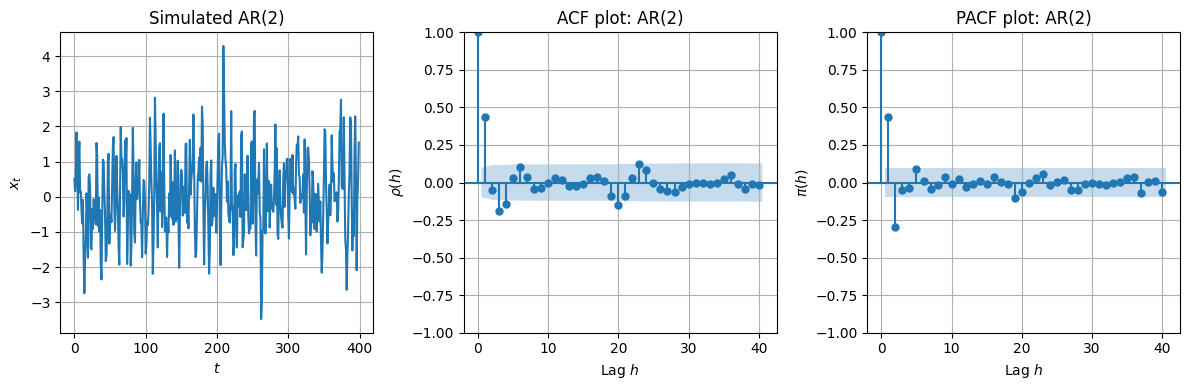

In [ ]:
np.random.seed(42)

# AR(2): X_t = 0.6 X_{t-1} - 0.3 X_{t-2} + W_t
ar = np.array([1, -0.6, 0.3])   # statsmodels uses 1 - phi1*L - phi2*L^2 ...
ma = np.array([1])
ar2 = ArmaProcess(ar, ma)
y_ar = ar2.generate_sample(nsample=400)

x = np.arange(len(y_ar))

fig, axs = get_figure(ncols=3)
time_plot(x = x, y=y_ar, ax=axs[0], title="Simulated AR(2)")
acf_plot(y_ar, 40, axs[1], title="AR(2)")
pacf_plot(y_ar, 40, axs[2], title="AR(2)")
fig.tight_layout()

stationarity_tests(pd.Series(y_ar))


The simulated AR(2) time series fluctuates around a constant mean and shows short-term persistence, indicating dependence on recent past values rather than long-term trends. The PACF shows significant spikes at lags 1 and 2 and becomes insignificant afterward.

#### MA Model

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.1996)
	- ZA: Stationary (p-value: 0.0005)


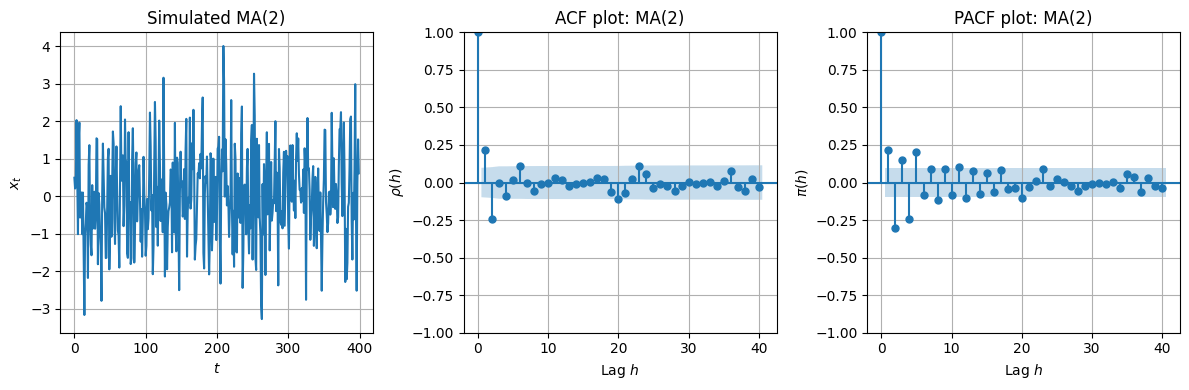

In [61]:
np.random.seed(42)

# MA(2): X_t = W_t + 0.7 W_{t-1} - 0.4 W_{t-2}
ar = np.array([1])
ma = np.array([1, 0.7, -0.4])
ma2 = ArmaProcess(ar, ma)
y_ma = ma2.generate_sample(nsample=400)

x = np.arange(len(y_ma))

fig, axs = get_figure(ncols=3)
time_plot(y=y_ma, x=x, ax=axs[0], title="Simulated MA(2)")
acf_plot(y_ma, 40, axs[1], title="MA(2)")
pacf_plot(y_ma, 40, axs[2], title="MA(2)")
fig.tight_layout()

stationarity_tests(pd.Series(y_ma))


All four stationarity tests consistently indicate that the MA(2) process is stationary. 

The simulated MA(2) process fluctuates around a constant mean with no visible long-term dependence. The ACF shows significant spikes at lags 1 and 2 followed by a sharp cutoff, while the PACF decays gradually.

#### ARMA Model

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.1400)
	- ZA: Stationary (p-value: 0.0000)


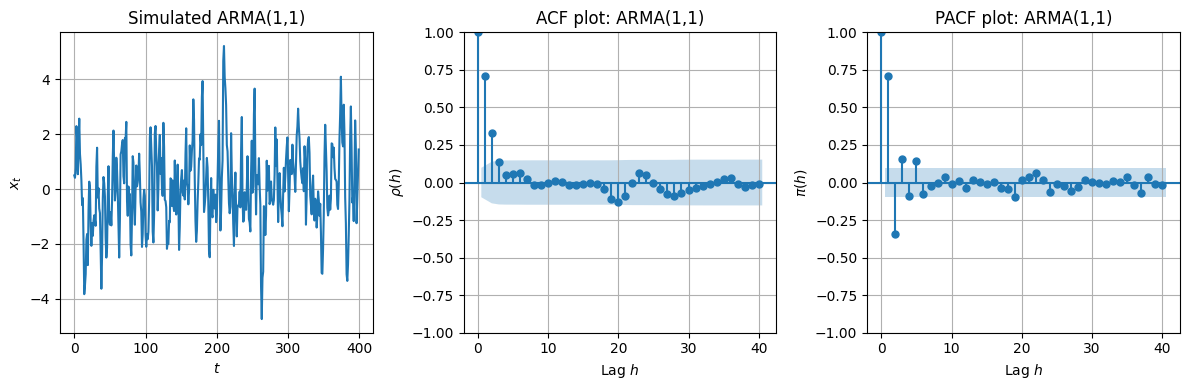

In [62]:
np.random.seed(42)

# ARMA(1,1): X_t = 0.5 X_{t-1} + W_t + 0.6 W_{t-1}
ar = np.array([1, -0.5])
ma = np.array([1, 0.6])
arma11 = ArmaProcess(ar, ma)
y_arma = arma11.generate_sample(nsample=400)

x = np.arange(len(y_arma))

fig, axs = get_figure(ncols=3)
time_plot(y=y_arma, x=x, ax=axs[0], title="Simulated ARMA(1,1)")
acf_plot(y_arma, 40, axs[1], title="ARMA(1,1)")
pacf_plot(y_arma, 40, axs[2], title="ARMA(1,1)")
fig.tight_layout()

stationarity_tests(pd.Series(y_arma))


All four stationarity tests consistently indicate that the ARMA process is stationary. 

The simulated ARMA(1,1) series shows short-term persistence but the dependence fades relatively quickly. Unlike “pure” AR or MA models, both the ACF and PACF taper off rather than exhibiting a sharp cutoff.

#### ARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -550.152
Date:                Fri, 26 Dec 2025   AIC                           1106.304
Time:                        18:32:26   BIC                           1118.271
Sample:                             0   HQIC                          1111.043
                                - 400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4486      0.056      7.971      0.000       0.338       0.559
ma.L1          0.6116      0.049     12.497      0.000       0.516       0.707
sigma2         0.9202      0.059     15.544      0.0

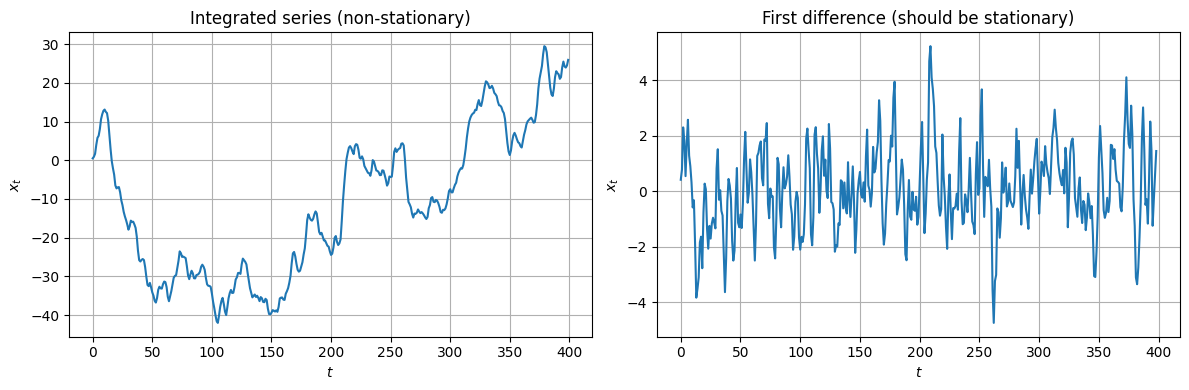

In [ ]:
np.random.seed(42)

x = y_arma
y_arima = np.cumsum(x)  

fig, axs = get_figure(ncols=2)
time_plot(y=y_arima, x=np.arange(len(y_arima)), ax=axs[0], title="Integrated series (non-stationary)")
time_plot(y=np.diff(y_arima), x=np.arange(len(np.diff(y_arima))), ax=axs[1], title="First difference")
fig.tight_layout()

model_arima = ARIMA(y_arima, order=(1, 1, 1))
fit_arima = model_arima.fit()
print(fit_arima.summary())


The original integrated series is clearly non-stationary, while first differencing removes the trend and yields a stationary process centered around zero. In the ARIMA(1,1,1) model, both the autoregressive and moving-average terms are statistically significant, meaning past values and past errors help explain the data. The residual diagnostics show no remaining autocorrelation, which suggests that the model describes the patterns in the differenced series well.

#### SARIMA

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -134.438
Date:                            Fri, 26 Dec 2025   AIC                            274.875
Time:                                    18:36:15   BIC                            282.167
Sample:                                         0   HQIC                           277.807
                                             - 96                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0888      0.111     -0.797      0.425      -0.307       0.130
ar.S.L12      -0.5384      0.104   

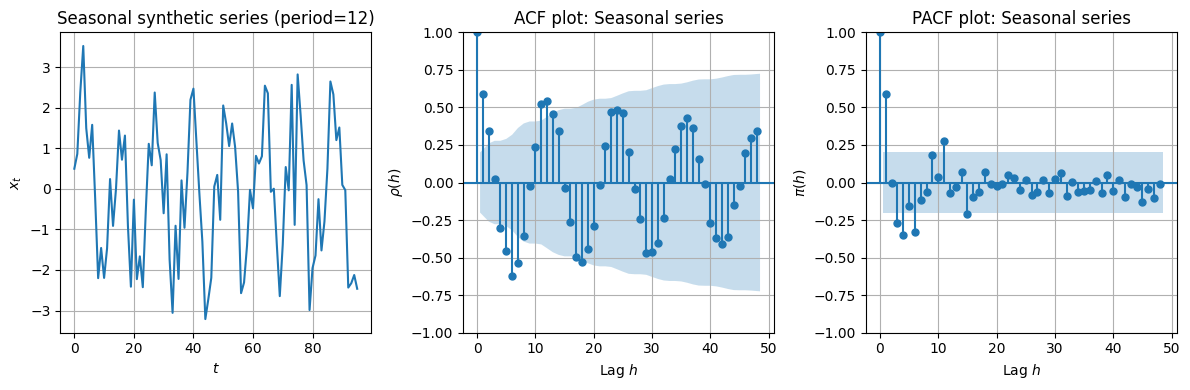

In [68]:
np.random.seed(42)

n = 8 * 12  # 8 years of monthly data
t = np.arange(n)
seasonal = 2.0 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(scale=1.0, size=n)
y_seasonal = seasonal + noise

fig, axs = get_figure(ncols=3)
time_plot(y=y_seasonal, x=t, ax=axs[0], title="Seasonal synthetic series (period=12)")
acf_plot(y_seasonal, 48, axs[1], title="Seasonal series")
pacf_plot(y_seasonal, 48, axs[2], title="Seasonal series")
fig.tight_layout()

# Fit SARIMA
sarima = SARIMAX(y_seasonal, order=(1, 0, 0), seasonal_order=(1, 1, 0, 12))
sarima_fit = sarima.fit(disp=False)
print(sarima_fit.summary())


The time plot shows a clear repeating cycle, and the ACF has noticeable structure at seasonal lags (multiples of 12).
The SARIMA(1,0,0)×(1,1,0,12) model captures this seasonal dependence well, as indicated by the significant seasonal AR term and the absence of autocorrelation in the residuals.

#### Real world data

In [ ]:
import pandas as pd

url = (
    "https://api.worldbank.org/v2/country/FR/"
    "indicator/SP.DYN.CBRT.IN"
    "?format=json&per_page=20000"
)

resp = requests.get(url, timeout=30)
resp.raise_for_status()
raw = resp.json()

rows = raw[1]
df = pd.DataFrame(rows)

data = df[["date", "value"]].dropna()
data.columns = ["year", "birth_rate"]

data["year"] = data["year"].astype(int)
data = data.sort_values("year")
data["time"] = pd.to_datetime(data["year"], format="%Y")

data.head()

,year,birth_rate,time
64,1960,18.7,1960-01-01
63,1961,18.7,1961-01-01
62,1962,18.6,1962-01-01
61,1963,18.5,1963-01-01
60,1964,18.4,1964-01-01


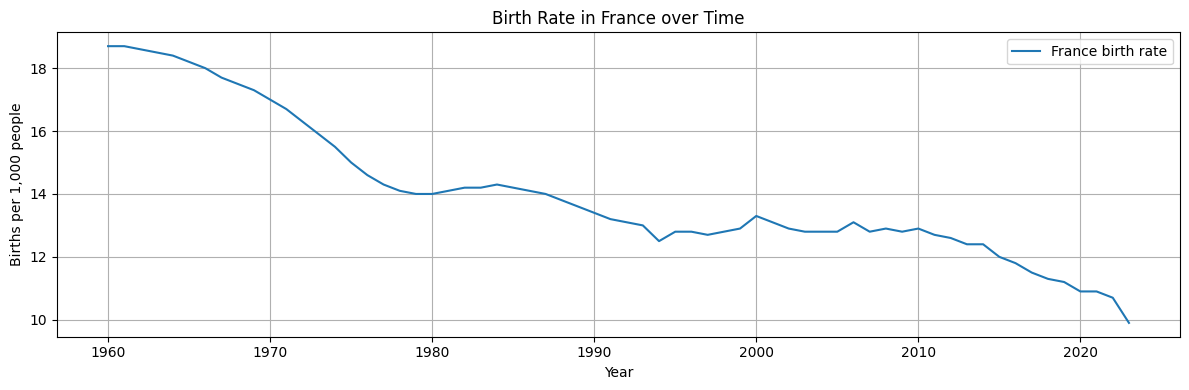

In [46]:
fig, axes = get_figure()
ax = axes[0]

time_plot(
    x=data["time"],
    y=data["birth_rate"],
    label="France birth rate",
    ax=ax,
    title="Birth Rate in France over Time",
    xlabel="Year",
    ylabel="Births per 1,000 people",
)

fig.tight_layout()


In [47]:
y=data["birth_rate"]

stationarity_tests(y)


Stationarity Test Results:
	- ADF: Non-Stationary (p-value: 0.8150)
	- PP: Non-Stationary (p-value: 0.7432)
	- KPSS: Non-Stationary (p-value: 0.0020)
	- ZA: Non-Stationary (p-value: 0.6027)


All stationarity tests consistently indicate that the birth rate time series is non-stationary.  
The result is expected, as the birth rate exhibits a clear long-term downward trend.

In [48]:
# first differencing

y_diff1 = y.diff().dropna()

stationarity_tests(y_diff1)

Stationarity Test Results:
	- ADF: Non-Stationary (p-value: 0.0748)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.2963)
	- ZA: Non-Stationary (p-value: 0.3661)


In [49]:
# second differencing

y_diff2 = y_diff1.diff().dropna()
stationarity_tests(y_diff2)

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.3600)
	- ZA: Stationary (p-value: 0.0000)


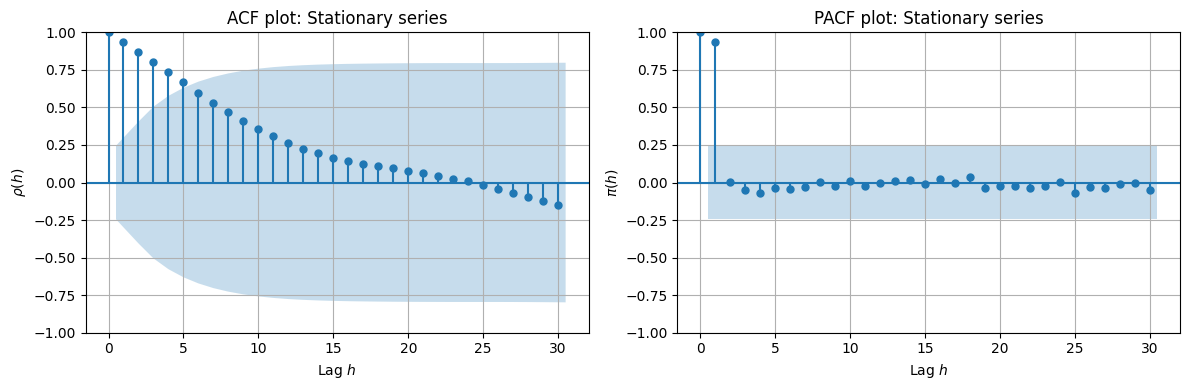

In [50]:
series_for_id = y

fig, axs = get_figure(ncols=2)

acf_plot(series_for_id, 30, axs[0], title="Stationary series")
pacf_plot(series_for_id, 30, axs[1], title="Stationary series")

fig.tight_layout()


The ACF shows a approximately exponential decay across several lags. This indicates that past values have a persistent, but gradually decreasing influence on the current observations.

The PACF shows a single dominant and statistically significant spike at lag 1, while all higher-order lags lie within the confidence bounds. This clear cutoff pattern  suggests an AR(1) structure for the stationary series.

Together, these patterns indicate that an ARIMA(1, 2, 0) model is an appropriate candidate for the data


In [51]:
model = ARIMA(
    y,
    order=(1, 2, 0)   
)

model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             birth_rate   No. Observations:                   64
Model:                 ARIMA(1, 2, 0)   Log Likelihood                  13.379
Date:                Fri, 26 Dec 2025   AIC                            -22.758
Time:                        10:51:21   BIC                            -18.504
Sample:                             0   HQIC                           -21.087
                                 - 64                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5441      0.090     -6.032      0.000      -0.721      -0.367
sigma2         0.0378      0.004      8.570      0.000       0.029       0.046
Ljung-Box (L1) (Q):                   0.90   Jarque-

/Users/nadine/.pyenv/versions/3.12.6/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nadine/.pyenv/versions/3.12.6/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nadine/.pyenv/versions/3.12.6/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The ARIMA(1,2,0) model was applied to the birth rate data after second-order differencing to make the series stationary. The autoregressive coefficient at lag 1 is negative and statistically significant (p < 0.001), which shows a strong short-term adjustment in the differenced series.

The Ljung–Box test does not reject the null hypothesis of no autocorrelation (p = 0.34). This indicates that the model captures the main time dependence in the data.
However, the residual tests show that the errors are not normally distributed (Jarque–Bera test, p < 0.001) and that their variance is not constant (p < 0.001). 

Overall, the ARIMA(1,2,0) model fits the birth rate data reasonably well, although it could be improved if stricter assumptions are needed.

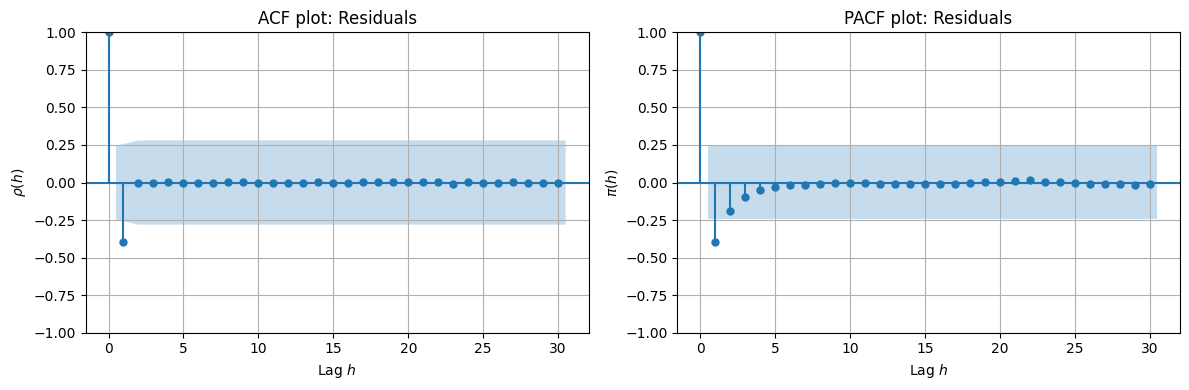

In [52]:
resid = model_fit.resid

fig, axs = get_figure(ncols=2)

acf_plot(resid, 30, axs[0], title="Residuals")
pacf_plot(resid, 30, axs[1], title="Residuals")

fig.tight_layout()


The ACF of the residuals shows that after lag 1 all autocorrelations are close to 0, indicating no significant remaining autocorrelation. This suggests that the ARIMA model has captured the main temporal structure of the data.
The PACF also shows no clear significant spikes beyond the first few lags, and the remaining values are close to zero.